In [4]:
import json
import os
## initial testing how json file works
json_string = open("../audio_features_good_data/NLX-1499781672246905747.json")
# print("--------",json_string.read())
parsed_json = json.load(json_string)

print(parsed_json.keys())
print(parsed_json['features']['audio'].keys())
print('length of spectral_centroid ', len(parsed_json['features']['audio']['spectral_centroid']))
print('length of ZCR ',len(parsed_json['features']['audio']['ZCR']))


dict_keys(['features', 'collectionID', 'recordingID', 'howlong', 'sampleID', 'survey'])
dict_keys(['ZCR', 'spectral_entropy', 'MFCC', 'spectral_rolloff', 'energy', 'spectral_flux', 'entropy', 'spectral_spread', 'spectral_centroid', 'chroma_vector', 'chroma_deviation'])
length of spectral_centroid  1199
length of ZCR  1199


In [5]:
sample_list = []
for json_file in os.listdir('../audio_features_good_data/'):
    json_string = open("../audio_features_good_data/" + json_file)
    parsed_json = json.load(json_string)
    sample_list.append(parsed_json)
    

In [6]:
#creating an aggregate sample dictionary, with sample id being the key 
# mapped to a dictionary, in which timepoint is key, and rest of data
# are the value
sample_ag_list = {}
for sample in sample_list:
    if sample["sampleID"] in ["Augustin Liebster","Au","A","Augus"]:
        sample['sampleID'] = '79'
    if sample["sampleID"] in ["dcorprew"]:
        sample['sampleID'] = '14'
    if sample["sampleID"] in ["lgr2"]:
        sample['sampleID'] = '53'
    if sample["sampleID"] in ["nr"]:
        sample['sampleID'] = '54'
    if sample['sampleID'] not in sample_ag_list.keys():
        sample_ag_list[sample["sampleID"]] = {}
    sample_ag_list[sample["sampleID"]][sample["howlong"]] = sample

In [8]:
print(sample_ag_list['32']['0'].keys())
print(sample_ag_list['32']['0']['features']['audio'].keys())
print(len(sample_ag_list['32']['0']['features']['audio']['chroma_vector'][1]))

dict_keys(['features', 'collectionID', 'recordingID', 'howlong', 'sampleID', 'survey'])
dict_keys(['ZCR', 'spectral_entropy', 'MFCC', 'spectral_rolloff', 'energy', 'spectral_flux', 'entropy', 'spectral_spread', 'spectral_centroid', 'chroma_vector', 'chroma_deviation'])
1199


In [10]:
dif_list_15 = []
dif_list_30 = []
dif_list_60 = []
dif_list_90 = []
dif_list_120 = []



# print len(sample_ag_list)   
# print sample_ag_list.keys()
# for value in sample_ag_list.values():
#     print value.keys()

for sampleID in sample_ag_list.keys():
    if '0' in sample_ag_list[sampleID].keys() and '15' in sample_ag_list[sampleID].keys():
        dif_list_15.append([sample_ag_list[sampleID]['0'],sample_ag_list[sampleID]['15']])
    if '0' in sample_ag_list[sampleID].keys() and '30' in sample_ag_list[sampleID].keys():
        dif_list_30.append([sample_ag_list[sampleID]['0'],sample_ag_list[sampleID]['30']])
    if '0' in sample_ag_list[sampleID].keys() and '60' in sample_ag_list[sampleID].keys():
        dif_list_60.append([sample_ag_list[sampleID]['0'],sample_ag_list[sampleID]['60']])
    if '0' in sample_ag_list[sampleID].keys() and '90' in sample_ag_list[sampleID].keys():
        dif_list_90.append([sample_ag_list[sampleID]['0'],sample_ag_list[sampleID]['90']])
    if '0' in sample_ag_list[sampleID].keys() and '120' in sample_ag_list[sampleID].keys():
        dif_list_120.append([sample_ag_list[sampleID]['0'],sample_ag_list[sampleID]['120']])
print (len(dif_list_15),len(dif_list_30),len(dif_list_60),len(dif_list_90),len(dif_list_120))

6 7 6 3 4


In [12]:
from numpy import *

for pair in dif_list_120:
    ZCR1 = array(pair[0]['features']['audio']['ZCR'])
    ZCR2 = array(pair[1]['features']['audio']['ZCR'])
    print(mean(ZCR1), mean(ZCR2))
    print(std(ZCR1), std(ZCR2))

0.0781424173188 0.0782259969432
0.0499481986711 0.0469857166498
0.108456608577 0.092776194318
0.0929982080918 0.0739077460567
0.0873625783131 0.086790413669
0.0645497878091 0.0626686310202
0.0660649603647 0.0505219110299
0.0745470999659 0.0617429999806


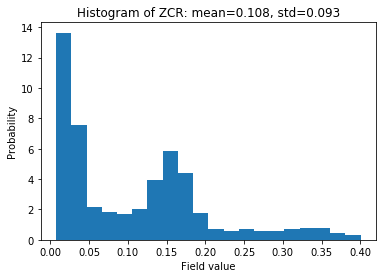

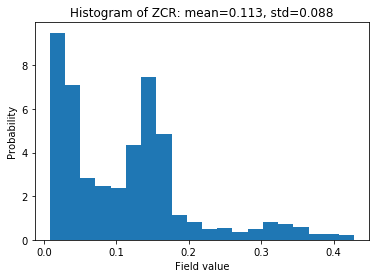

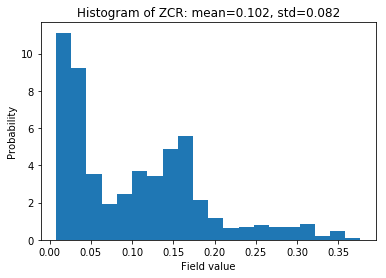

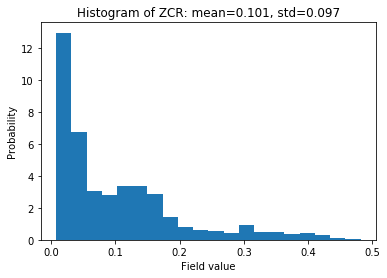

In [51]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

def plot_hist(data, sample_index, field, num_bins):
    """
    this function plots a histogram of single time point voice feature sample on a range
    INPUT:
        data: total data sample organized in dictionary format with first layer being sample_id, second layer being time_point
        sample_index: index of list of samples to be ploted, in form of list of tuples (sample_id, timepoint)
        field: string value of the voice field/feature to be ploted on historgram
        num_bins: the number of bins in the histogram
    OUTPUT:
        plotting of histogram
    """
    field_all = np.array([],dtype=np.float32)
    for idx in sample_index:
        field_all = np.append(field_all, data[str(idx[0])][str(idx[1])]['features']['audio'][field])   
    n, bins, patches = plt.hist(field_all, num_bins, normed=1)
    plt.xlabel('Field value')
    plt.ylabel('Probability')
    plt.title('Histogram of '+field+': mean='+str(np.around(np.mean(field_all),decimals=3))+', std='+str(np.around(np.std(field_all),decimals=3)))
    plt.show()

plot_hist(sample_ag_list, [(32,0)], 'ZCR', 20)
plt.figure(2)
plot_hist(sample_ag_list, [(32,15)], 'ZCR', 20)
plt.figure(3)
plot_hist(sample_ag_list, [(32,30)], 'ZCR', 20)
plt.figure(4)
plot_hist(sample_ag_list, [(32,60)], 'ZCR', 20)

        

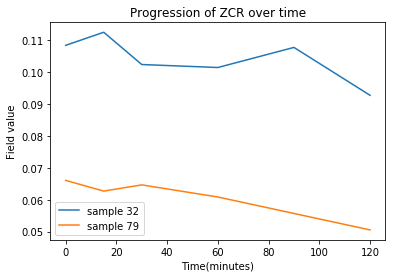

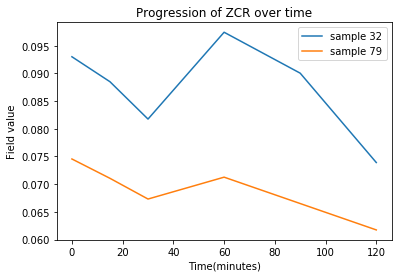

In [64]:
def plot_time_multi_sample(data, sample_index, field, summary_method):
    """
    this function plots the field across different time points among different samples
    INPUT:
        data: total data sample organized in dictionary format with first layer being sample_id, second layer being time_point
        sample_index: index of list of samples to be ploted, in form of list sample_id
        field: string value of the voice field/feature to be ploted on historgram
        summary_method: way to summarize 1200 numbers into 1 number, option = mean, std
    OUTPUT:
        display line graph of field across time
    """
    for idx in sample_index:
        sample = data[str(idx)]
        summary_values = []
        time_values = []
        for sample_time in sample.keys():
            if summary_method == 'mean':
                value = np.mean(sample[sample_time]['features']['audio'][field])
            elif summary_method == 'std':
                value = np.std(sample[sample_time]['features']['audio'][field])
            summary_values.append(value)
            time_values.append(int(sample_time))
        plt.plot(time_values, summary_values, label="sample "+str(idx))
    plt.legend()
    plt.xlabel('Time(minutes)')
    plt.ylabel('Field value')
    plt.title('Progression of '+field+' over time')
    plt.show()

plot_time_multi_sample(sample_ag_list, [32, 79], 'ZCR', 'mean')
plot_time_multi_sample(sample_ag_list, [32, 79], 'ZCR', 'std')

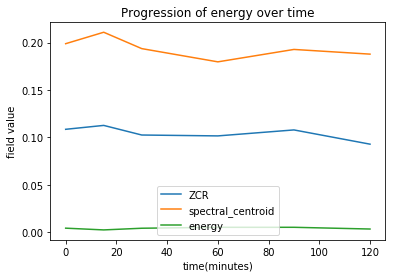

In [72]:
def plot_time_multi_feature(data, sample_index, field_list, summary_method):
    """
    this function plots different field across different time points on one sample
    INPUT:
        data: total data sample organized in dictionary format with first layer being sample_id, second layer being time_point
        sample_index: sample_id of the sample in interest
        field_list: list of string value of the voice field/feature to be ploted on historgram
        summary_method: way to summarize 1200 numbers into 1 number, option = mean, std
    OUTPUT:
        display line graph of field across time
    """
    sample = data[str(sample_index)]
    for field in field_list:
        summary_values = []
        time_values = []
        for sample_time in sample.keys():
            if summary_method == 'mean':
                value = np.mean(sample[sample_time]['features']['audio'][field])
            elif summary_method == 'std':
                value = np.std(sample[sample_time]['features']['audio'][field])
            summary_values.append(value)
            time_values.append(int(sample_time))
        plt.plot(time_values, summary_values, label=field)
    plt.legend()
    plt.xlabel('time(minutes)')
    plt.ylabel('field value')
    plt.title('Progression of '+field+' over time')
    plt.show()

plot_time_multi_feature(sample_ag_list, 32, ['ZCR','spectral_centroid','energy'], 'mean')